Arquivo 'SampleSuperstore.csv' carregado com sucesso!
--- Visão Geral dos Dados ---


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164



--- Estrutura do Arquivo ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


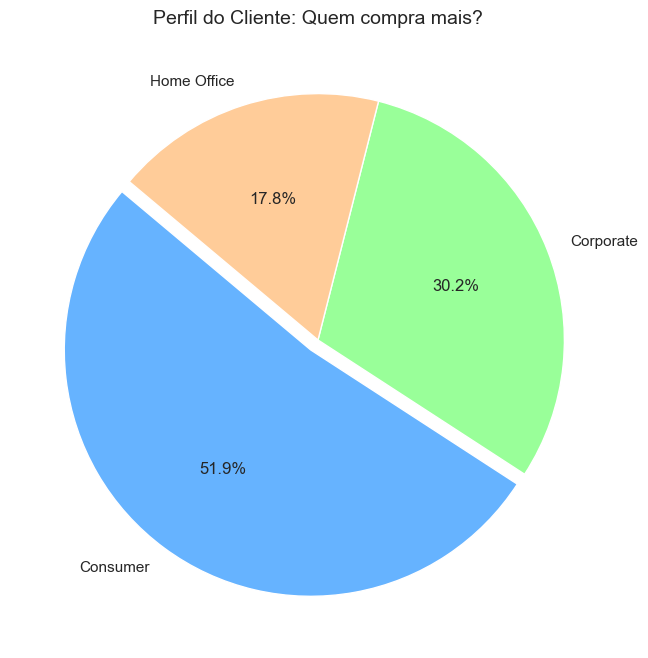

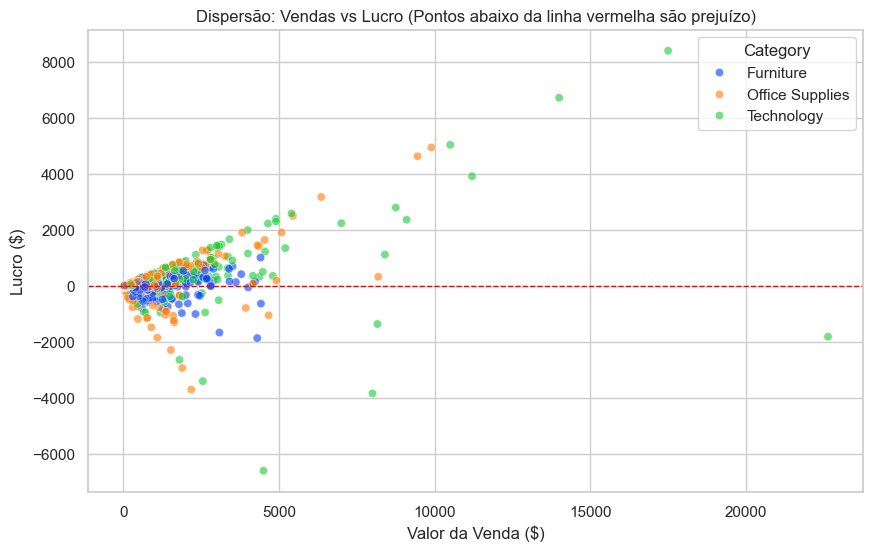

C:\Users\2devt\AppData\Local\Temp\ipykernel_8888\1388909139.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lucro_sub, y="Sub-Category", x="Profit", palette="RdYlGn")


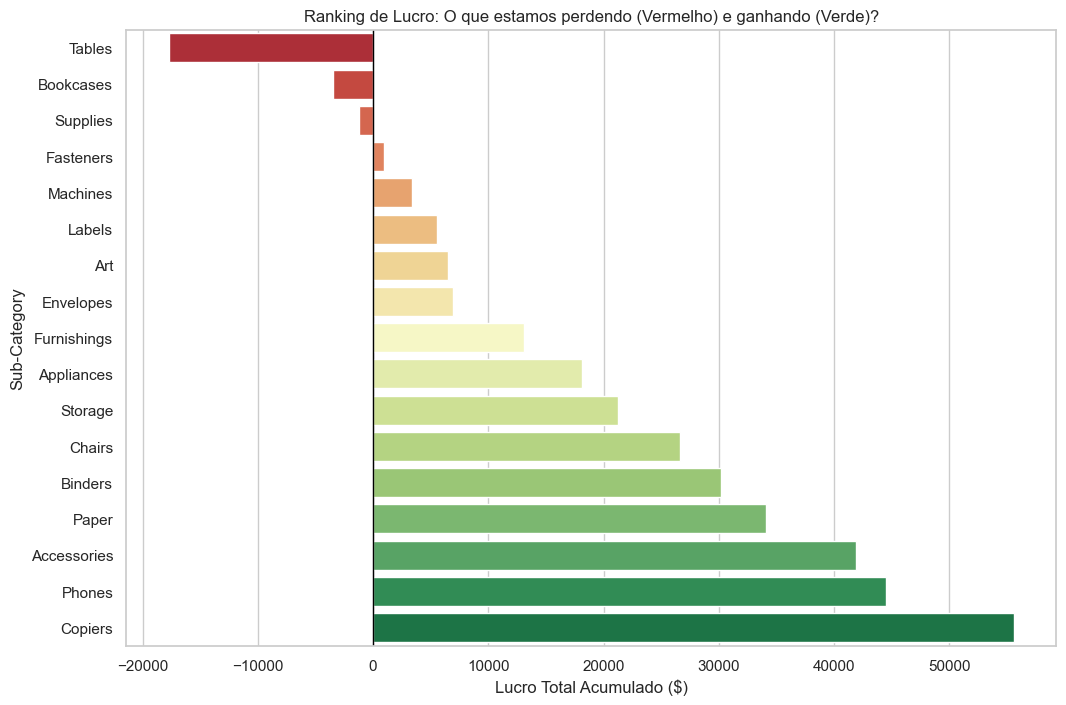

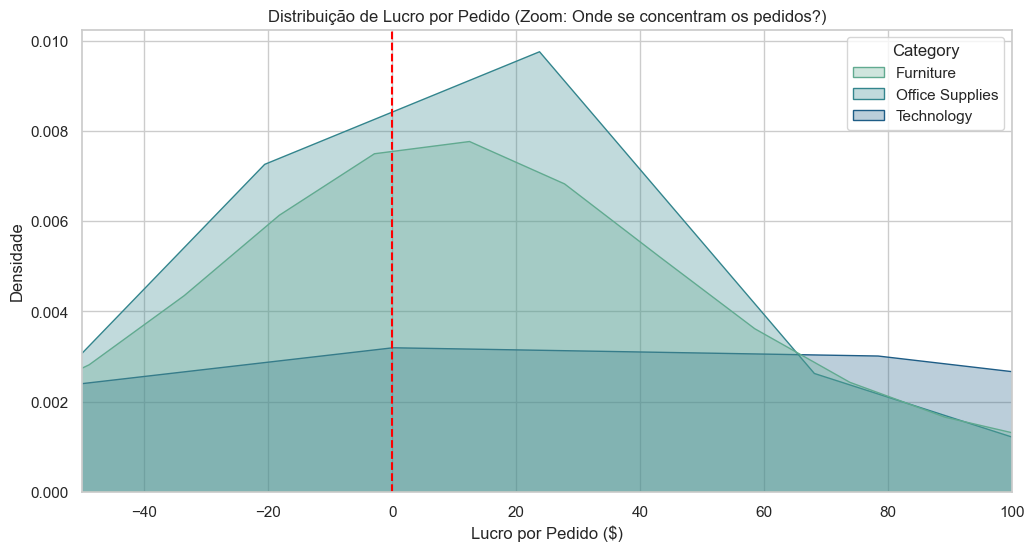

C:\Users\2devt\AppData\Local\Temp\ipykernel_8888\1388909139.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x="Sales", y="State", palette="Blues_d")


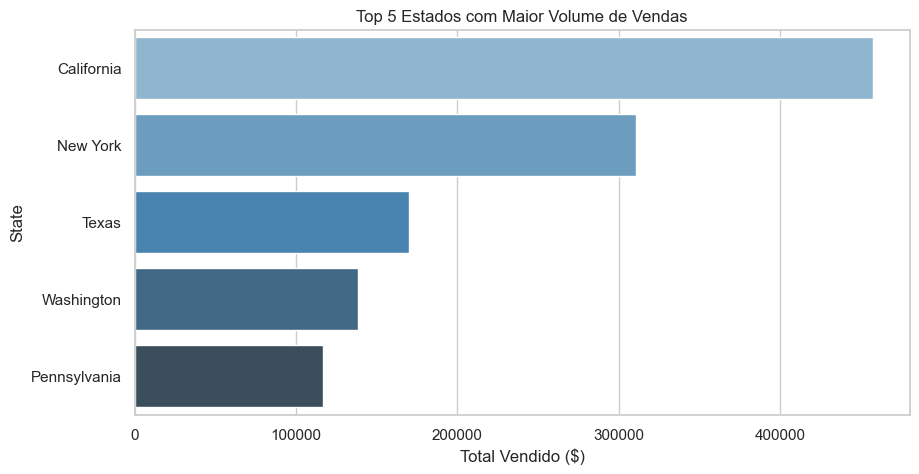

C:\Users\2devt\AppData\Local\Temp\ipykernel_8888\1388909139.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Ship Mode", y="Profit", palette="Set2")


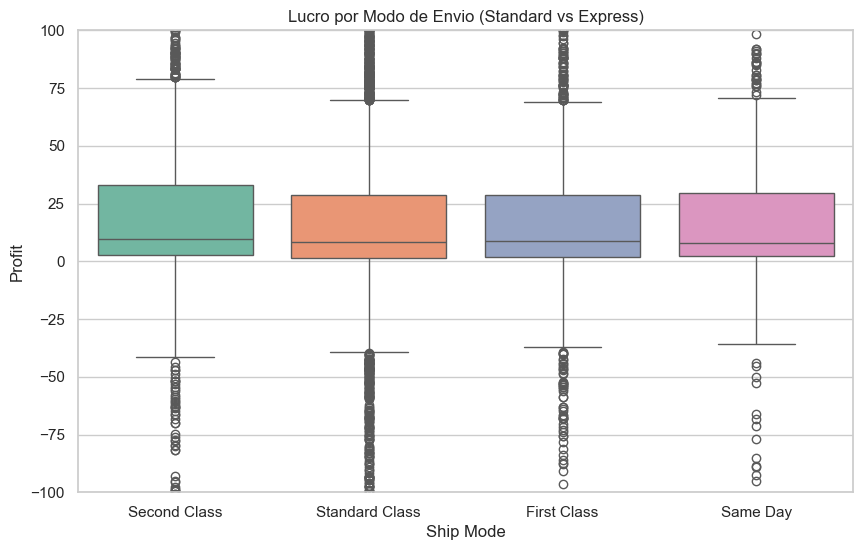

Análise completa finalizada!


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. CONFIGURAÇÃO E CARREGAMENTO ---

# Configuração visual: Fundo limpo com linhas de grade suaves
sns.set_theme(style="whitegrid")

# Carregar base de dados
try:
    df = pd.read_csv("SampleSuperstore.csv")
    print("Arquivo 'SampleSuperstore.csv' carregado com sucesso!")
except FileNotFoundError:
    print("ERRO: O arquivo não foi encontrado. Verifique se o nome está correto.")

# Mostra as primeiras linhas e informações básicas
print("--- Visão Geral dos Dados ---")
display(df.head())
print("\n--- Estrutura do Arquivo ---")
df.info()


# --- 2. PERFIL DO CLIENTE (Gráfico de Pizza) ---

plt.figure(figsize=(8, 8))
# Contando quantos pedidos temos por Segmento
dados_pizza = df["Segment"].value_counts()

# Plotando a Pizza
# explode=(0.05, 0, 0) serve para 'destacar' a primeira fatia
plt.pie(
    dados_pizza.values,
    labels=dados_pizza.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#66b3ff", "#99ff99", "#ffcc99"],
    explode=(0.05, 0, 0),
)

plt.title("Perfil do Cliente: Quem compra mais?", fontsize=14)
plt.show()


# --- 3. RELAÇÃO VENDAS X LUCRO (Scatterplot Simples) ---

plt.figure(figsize=(10, 6))
# Cada bolinha é uma venda.
# Hue (Cor) separa por Categoria.
sns.scatterplot(
    data=df, x="Sales", y="Profit", hue="Category", alpha=0.6, palette="bright"
)

# Linha vermelha no zero para marcar o prejuízo
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Dispersão: Vendas vs Lucro (Pontos abaixo da linha vermelha são prejuízo)")
plt.xlabel("Valor da Venda ($)")
plt.ylabel("Lucro ($)")
plt.show()


# --- 4. RANKING DE LUCRATIVIDADE (Barras Coloridas) ---
# Este gráfico é fundamental para ver quais Sub-Categorias dão prejuízo.

# Agrupar e ordenar
lucro_sub = df.groupby("Sub-Category")["Profit"].sum().sort_values().reset_index()

plt.figure(figsize=(12, 8))
# Paleta 'RdYlGn' pinta automaticamente: Vermelho (valores baixos/negativos) e Verde (altos)
sns.barplot(data=lucro_sub, y="Sub-Category", x="Profit", palette="RdYlGn")

plt.axvline(0, color="black", linewidth=1)  # Linha central
plt.title("Ranking de Lucro: O que estamos perdendo (Vermelho) e ganhando (Verde)?")
plt.xlabel("Lucro Total Acumulado ($)")
plt.show()


# --- 5. DENSIDADE DE LUCRO (Linhas Suaves - Substitui o Hexbin) ---
# Mostra qual é o valor de lucro mais comum (o pico da montanha).

plt.figure(figsize=(12, 6))
# KDE desenha a curva de densidade
sns.kdeplot(
    data=df,
    x="Profit",
    hue="Category",
    fill=True,
    common_norm=False,
    palette="crest",
    alpha=0.3,
)

# Damos um 'zoom' para focar onde a maioria dos dados está (ignorando outliers extremos)
plt.xlim(-50, 100)
plt.axvline(0, color="red", linestyle="--")  # Linha do zero
plt.title("Distribuição de Lucro por Pedido (Zoom: Onde se concentram os pedidos?)")
plt.xlabel("Lucro por Pedido ($)")
plt.ylabel("Densidade")
plt.show()


# --- 6. ANÁLISE REGIONAL (Barras Horizontais) ---
# Top 5 Estados que mais vendem

top_states = (
    df.groupby("State")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_states, x="Sales", y="State", palette="Blues_d")
plt.title("Top 5 Estados com Maior Volume de Vendas")
plt.xlabel("Total Vendido ($)")
plt.show()


# --- 7. LOGÍSTICA (Boxplot Simples) ---
# Comparação simples entre as classes de envio

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Ship Mode", y="Profit", palette="Set2")
plt.ylim(-100, 100)  # Zoom para ver melhor a caixa (mediana)
plt.title("Lucro por Modo de Envio (Standard vs Express)")
plt.show()

print("Análise completa finalizada!")